# Perform Principal component analysis and perform clustering using first 
* 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain  optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters).

## Import Necessary Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster import hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [ ]:
data = pd.read_csv('wine.csv')
data

## EDA 

In [ ]:
data.info()

In [ ]:
#Summary of the data
data.iloc[:, 1:].describe()

In [ ]:
#Checking the null values
data.isna().sum()

In [ ]:
#Checking the duplicate data
data[data.duplicated()]

In [ ]:
#Checking the correlation between data
data.iloc[:, 1:].corr().round(2)

In [ ]:
#Visualizing the correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:, 1:].corr().round(2), annot=True)
plt.show()

In [ ]:
#Visualizing the data_Type
plt.pie(data.Type.value_counts(), explode=(0,0.1,0.05), autopct='%0.1f%%',labels=[2,1,3] )
plt.show()

In [ ]:
#Checking the distribution of data
col = data.columns[1:]
for i in col:
    plt.hist(data[i])
    plt.title(i)
    plt.grid()
    plt.show()

In [ ]:
#Checking the outliers in the data

for i in col:
    sns.boxplot(data=data[i])
    plt.title(i)
    plt.grid()
    plt.show()

In [ ]:
#Locate the Outliers from dataset
Mal = np.where(data['Malic']>5.2)
Ash = np.where((data['Ash']>3) | (data['Ash']<1.5))
Alc = np.where((data['Alcalinity']>27.5) | (data['Alcalinity']<11))
Mag = np.where(data['Magnesium']>135)
Pro = np.where(data['Proanthocyanins']>3)
Col = np.where(data['Color']>10.6)
Hue = np.where(data['Hue']>1.6)

In [ ]:
#Remove the Outliers
data.drop(data.index[data['Malic']>5], axis=0, inplace=True)
data.drop(data.index[(data['Ash']>3) | (data['Ash']<1.8)], axis=0, inplace=True)
data.drop(data.index[(data['Alcalinity']>26.5) | (data['Alcalinity']<12)], axis=0, inplace=True)
data.drop(data.index[data['Magnesium']>133], axis=0, inplace=True)
data.drop(data.index[data['Proanthocyanins']>2.85], axis=0, inplace=True)
data.drop(data.index[data['Color']>10.3], axis=0, inplace=True)
data.drop(data.index[data['Hue']>1.6], axis=0, inplace=True)

In [ ]:
#Rechecking the Outliers in dataset
for i in col:
    sns.boxplot(data[i])
    plt.title(i)
    plt.grid()
    plt.show()

In [ ]:
data.shape

## Feature Scaling

In [ ]:
data_norm = StandardScaler()

In [ ]:
X = data_norm.fit_transform(data.iloc[:, 1:])

In [ ]:
X.shape

## Model Building with clustering algorithm without PCA   

### Hierarchical Clustering

#### Dendogram Visualisation

In [ ]:
# create dendrogram with single method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

In [ ]:
# create dendrogram with average method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [ ]:
# create dendrogram with ward method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [ ]:
# create dendrogram with complete method
plt.figure(figsize=(13,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

### We'll choose ward method for hierarchial clustering since, it has properly distributed into 3 groups for our dataset 

## Model Building & Training 

In [22]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

## Model Testing & Evaluation

In [23]:
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [24]:
#Making clusters starting with no.1
data1 = data.copy()
data1['Clusters'] = y_hc+1
data1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,3
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [25]:
#No. of states in cluster 1
data1[data1['Clusters']==1]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,1
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,1
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,1
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,1
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,1
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,1
71,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410,1
72,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,1
74,2,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,1
75,2,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428,1


In [26]:
#No. of states in cluster 2
data1[data1['Clusters']==2]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,2
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,2
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,2
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,2
10,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,2


In [27]:
#No. of states in cluster 3
data1[data1['Clusters']==3]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
70,2,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.050000,0.906,1.82,870,3
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.840,2.01,515,3
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.700,2.12,372,3
129,2,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.600000,0.790,2.57,580,3
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.760,1.29,630,3
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.740,1.42,530,3
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.660,1.36,560,3
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.780,1.29,600,3
134,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.750,1.51,650,3
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.730,1.58,695,3


In [28]:
#No. of clusters and its distribution
data1.Clusters.value_counts()

2    56
1    50
3    42
Name: Clusters, dtype: int64

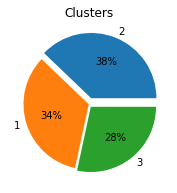

In [29]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data1.Clusters.value_counts(), autopct='%0.f%%', labels=[2,1,3], explode=(0.1,0,0.05))
plt.title('Clusters')
plt.show()

In [30]:
#Summarizing the cluster
data1.iloc[:, 1:].groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,12.248800,1.792000,2.275000,20.364000,90.620000,2.253200,2.054200,0.375600,1.518400,2.957000,1.062200,2.834400,488.820000
1,2,13.724107,1.998750,2.449821,17.308929,106.375000,2.815893,2.935000,0.288929,1.839107,5.473393,1.059464,3.139821,1096.571429
2,3,13.059524,3.232857,2.402143,21.033333,98.714286,1.633095,0.829524,0.433095,1.083810,6.645714,0.706333,1.740000,623.023810


### K-Means

### Elbow Method

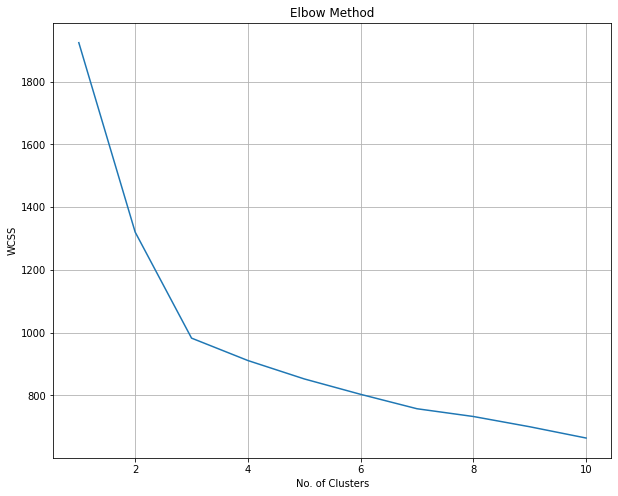

In [31]:
#We will determine the Optimum no.of clusters using elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8))
plt.plot(range(1,11), wcss)
plt.grid()
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score

In [32]:
silhouette_score(X, kmeans.labels_)

0.14348620258548733

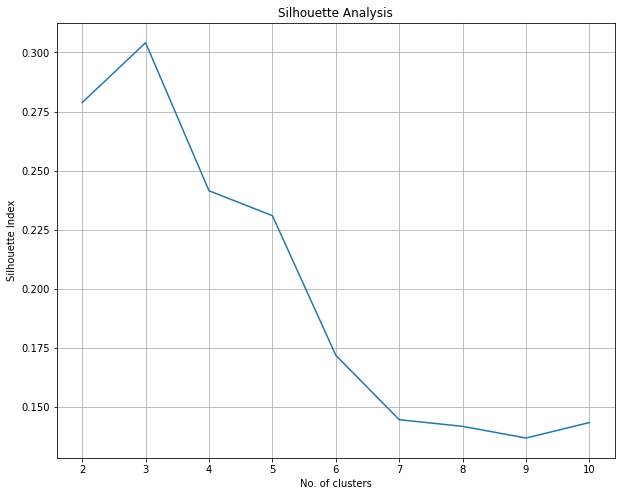

In [33]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    labels = kmeans.fit_predict(X)
    db_index = silhouette_score(X, labels)
    results.update({i: db_index})

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Index")
plt.title('Silhouette Analysis')
plt.show()

### Calinski Harabasz Score

In [34]:
calinski_harabasz_score(X, kmeans.labels_)

29.07568362543575

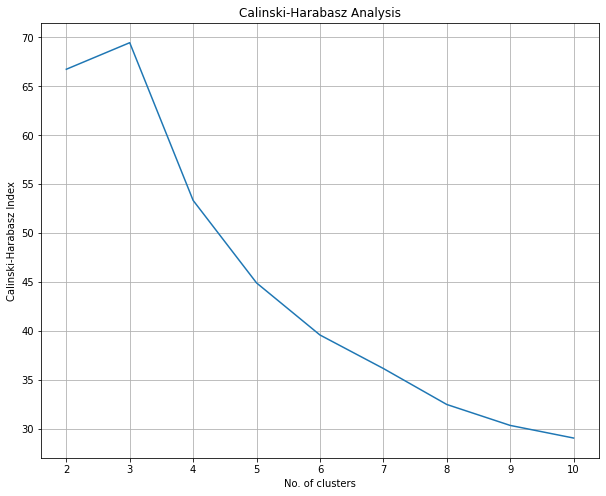

In [35]:
#We will determine the Optimum no.of clusters using calinski_harabasz_score
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    labels = kmeans.fit_predict(X)
    db_index = calinski_harabasz_score(X, labels)
    results.update({i: db_index})

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("No. of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title('Calinski-Harabasz Analysis')
plt.show()

### From above 3 methods, we can go ahead with no. of clusters = 3.

## Model Building & Training

In [36]:
kmeans1 = KMeans(n_clusters=3, random_state=0, max_iter=500)

## Model Prediction

In [37]:
y_km = kmeans1.fit_predict(X)
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
#Making clusters starting with no.1
data2 = data.copy()
data2['Clusters'] = y_km+1
data2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [39]:
#No. of states in cluster 1
data2[data2['Clusters']==1]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
10,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1


In [40]:
#No. of states in cluster 2
data2[data2['Clusters']==2]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.98,1.59,450,2
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.84,2.01,515,2
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.70,2.12,372,2
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,2
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,2
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,2
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,2
134,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,2
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,2
136,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,2


In [41]:
#No. of states in cluster 3
data2[data2['Clusters']==3]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.250,1.67,680,3
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.230,2.46,630,3
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.220,2.87,420,3
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.450,2.23,355,3
65,2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.190,2.30,678,3
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.120,3.48,510,3
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.020,1.93,750,3
70,2,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870,3
71,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.360,3.16,410,3
72,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.980,2.78,472,3


In [42]:
#No. of clusters and its distribution
data2.Clusters.value_counts()

1    54
3    53
2    41
Name: Clusters, dtype: int64

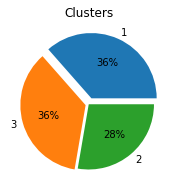

In [43]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data2.Clusters.value_counts(), autopct='%0.f%%', labels=[1,3,2], explode=(0.1,0.05,0))
plt.title('Clusters')
plt.show()

In [44]:
#Summarizing the cluster
data2.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,1.000000,13.750185,2.027222,2.457593,17.281481,106.759259,2.836481,2.961481,0.286852,1.855185,5.520556,1.053889,3.167963,1112.962963
1,2,2.926829,13.092927,3.200732,2.398049,20.921951,99.097561,1.644146,0.816585,0.437317,1.056829,6.810244,0.706098,1.714146,613.829268
2,3,2.000000,12.267358,1.822830,2.279245,20.375472,90.679245,2.233208,2.047358,0.372264,1.526792,2.946226,1.061245,2.816604,504.698113


### Applying PCA

In [45]:
#Applying PCA to reduce dimensions
pca = PCA(random_state=0)
pca_values = pca.fit_transform(X)

In [46]:
pca_values

array([[ 3.71293406, -1.31510161, -0.22879602, ..., -0.4380291 ,
         0.49522629,  0.15341116],
       [ 2.82373869, -0.63552883,  1.23816397, ..., -0.06504533,
        -0.02283588,  0.0492142 ],
       [ 4.19199869, -2.36956058, -0.22169409, ...,  0.59873967,
        -0.10494024,  0.36929802],
       ...,
       [-2.45340798, -3.56168875, -0.97453143, ...,  0.56472265,
         0.82175181,  0.13830913],
       [-2.18468455, -2.91066365, -0.59223004, ...,  0.34703196,
         0.51181152,  0.25169523],
       [-3.04862621, -3.18218651,  1.56930551, ..., -0.44798329,
        -0.12588399,  0.2665032 ]])

In [47]:
# The amount of variance that each PCA has
pca.explained_variance_ratio_

array([0.38734111, 0.21082798, 0.09263909, 0.06819302, 0.05054675,
       0.04586036, 0.0360182 , 0.02751587, 0.02365302, 0.02122921,
       0.01671219, 0.01325482, 0.00620838])

In [48]:
# Cummulative variance of each PCA
np.cumsum(np.round(pca.explained_variance_ratio_, 2)*100)

array([ 39.,  60.,  69.,  76.,  81.,  86.,  90.,  93.,  95.,  97.,  99.,
       100., 101.])

In [49]:
#First 3 principal components have more contribution i.e about 70%.
#So we are considering first 3 components for the building model.
pca_values[:,:3]

array([[ 3.71293406, -1.31510161, -0.22879602],
       [ 2.82373869, -0.63552883,  1.23816397],
       [ 4.19199869, -2.36956058, -0.22169409],
       [ 1.18931925, -0.93088621,  2.44991858],
       [ 3.43011483, -1.82236251, -0.6292072 ],
       [ 2.73013376, -0.81995532, -0.83662654],
       [ 2.27802134, -1.63412864,  0.39105411],
       [ 2.78144856, -0.54825553, -1.85961667],
       [ 2.9533431 , -0.44494258, -1.20089671],
       [ 3.74442107, -0.81532836, -0.2868713 ],
       [ 1.87621468, -0.33044192, -1.00219613],
       [ 2.27344485, -0.2738531 , -0.71937577],
       [ 2.58347269, -1.5632204 ,  0.54961122],
       [ 2.53531479, -2.18924646,  1.26572645],
       [ 2.13779463, -1.4588323 ,  1.01277346],
       [ 3.92523862, -2.08775112, -0.39274502],
       [ 2.37758634, -1.20198321, -0.08433919],
       [ 3.42350885, -0.71024269, -0.59543267],
       [ 1.21691506, -0.2736597 ,  1.22495078],
       [ 2.6087056 ,  0.39452344, -0.33863851],
       [ 1.61633058,  0.73514478,  0.243

In [50]:
#Creating dataset using PCA (first 3 components)
wine_data_pca =pd.DataFrame(pca_values[:,:3], columns=['PC1', 'PC2', 'PC3'])
wine_data_pca.head(10)

,PC1,PC2,PC3
0,3.712934,-1.315102,-0.228796
1,2.823739,-0.635529,1.238164
2,4.191999,-2.369561,-0.221694
3,1.189319,-0.930886,2.449919
4,3.430115,-1.822363,-0.629207
5,2.730134,-0.819955,-0.836627
6,2.278021,-1.634129,0.391054
7,2.781449,-0.548256,-1.859617
8,2.953343,-0.444943,-1.200897
9,3.744421,-0.815328,-0.286871


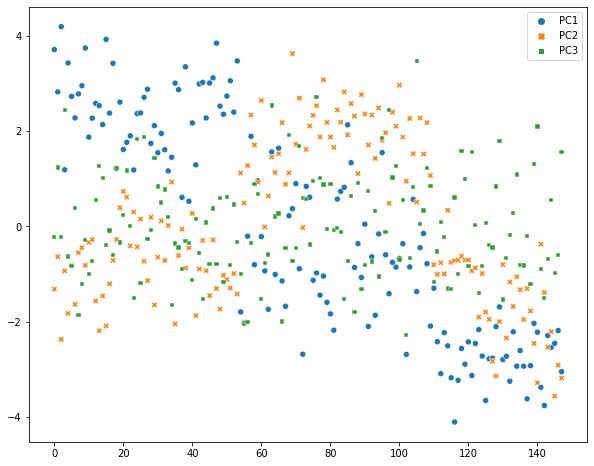

In [51]:
# Visualization of PCAs
fig=plt.figure(figsize=(10,8))
sns.scatterplot(data=wine_data_pca)
plt.show()

## Checking with Clustering Algorithms

### Hierarchical Clustering with PCA

#### Dendogram Visualisation

In [52]:
# create dendrogram with single method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(wine_data_pca, method='single'))

NameError: name 'sch' is not defined

<Figure size 1080x576 with 0 Axes>

In [ ]:
# create dendrogram with average method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(wine_data_pca, method='average'))

In [ ]:
# create dendrogram with ward method
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(wine_data_pca, method='ward'))

In [ ]:
# create dendrogram with complete method
plt.figure(figsize=(13,5))
dendrogram = sch.dendrogram(sch.linkage(wine_data_pca, method='complete'))

### We'll choose ward method for hierarchial clustering since, it has properly distributed into 3 groups for our dataset 

## Model Building & Training 

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

## Model Testing & Evaluation

In [ ]:
y_hc = hc.fit_predict(wine_data_pca)
y_hc

In [ ]:
#Making clusters starting with no.1
data1 = wine_data_pca.copy()
data1['Clusters'] = y_hc+1
data1

In [ ]:
#No. of states in cluster 1
data1[data1['Clusters']==1]

In [ ]:
#No. of states in cluster 2
data1[data1['Clusters']==2]

In [ ]:
#No. of states in cluster 3
data1[data1['Clusters']==3]

In [ ]:
#No. of clusters and its distribution
data1.Clusters.value_counts()

In [ ]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data1.Clusters.value_counts(), autopct='%0.f%%', labels=[1,2,3], explode=(0.1,0,0.05))
plt.title('Clusters')
plt.show()

In [ ]:
#Summarizing the cluster
data1.groupby('Clusters').agg(['mean']).reset_index()

### K-Means

### Elbow Method

In [ ]:
#We will determine the Optimum no.of clusters using elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    kmeans.fit_predict(wine_data_pca)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8))
plt.plot(range(1,11), wcss)
plt.grid()
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score

In [ ]:
silhouette_score(wine_data_pca, kmeans.labels_)

In [ ]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    labels = kmeans.fit_predict(wine_data_pca)
    db_index = silhouette_score(wine_data_pca, labels)
    results.update({i: db_index})

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Index")
plt.title('Silhouette Analysis')
plt.show()

### Calinski Harabasz Score

In [ ]:
calinski_harabasz_score(wine_data_pca, kmeans.labels_)

In [ ]:
#We will determine the Optimum no.of clusters using calinski_harabasz_score
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', max_iter=500)
    labels = kmeans.fit_predict(wine_data_pca)
    db_index = calinski_harabasz_score(wine_data_pca, labels)
    results.update({i: db_index})

plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("No. of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title('Calinski-Harabasz Analysis')
plt.show()

### From above 3 methods, we can go ahead with no. of clusters = 3.

## Model Building & Training

In [ ]:
kmeans1 = KMeans(n_clusters=3, random_state=0, max_iter=500)

## Model Prediction

In [ ]:
y_km = kmeans1.fit_predict(wine_data_pca)
y_km

In [ ]:
#Making clusters starting with no.1
data2 = wine_data_pca.copy()
data2['Clusters'] = y_km+1
data2

In [ ]:
#No. of states in cluster 1
data2[data2['Clusters']==1]

In [ ]:
#No. of states in cluster 2
data2[data2['Clusters']==2]

In [ ]:
#No. of states in cluster 3
data2[data2['Clusters']==3]

In [ ]:
#No. of clusters and its distribution
data2.Clusters.value_counts()

In [ ]:
#Pie-Chart Visualization
plt.figure(figsize=(8,3))
plt.pie(data2.Clusters.value_counts(), autopct='%0.f%%', labels=[1,3,2], explode=(0.1,0.05,0))
plt.title('Clusters')
plt.show()

In [ ]:
#Summarizing the cluster
data2.groupby('Clusters').agg(['mean']).reset_index()

### Conclusion:
 
**Silhouette score (KMeans Clustering):**

* With PCA the score is  31.09.

* Without PCA the score is 14.35.



**Calinski Harabaz score (KMeans Clustering):**

* With PCA the score is  111.34

* Without PCA the score is  29.08

**From this, we can say that KMeans clustering model done with the help of PCA is better than without PCA.**

### ====================================================================